In [66]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os
os.chdir('../../stock_price_prediction')


In [68]:
os.getcwd()

'c:\\Users\\sg1404-dsk01-user1\\Downloads\\stock_price_prediction'

In [30]:
import yfinance as yf

def fetch_stock_data(symbol, start_date, end_date):
    """
    Fetches historical stock prices for a given symbol between start_date and end_date.
    
    Parameters:
        symbol (str): The ticker symbol for the stock.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
        
    Returns:
        pandas.DataFrame: A DataFrame with historical stock prices and other information.
    """
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data


In [105]:
stock_data = fetch_stock_data('AMZN', '2023-01-01', '2023-12-30')

[*********************100%%**********************]  1 of 1 completed


In [104]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,121.208320,122.768680,119.756080,121.372800,121.372800,5.883159e+07
std,18.962923,18.903177,18.942333,18.900946,18.900946,2.112249e+07
min,83.029999,85.419998,81.430000,83.120003,83.120003,2.237840e+07
25%,101.695002,103.384998,101.035002,102.254999,102.254999,4.540690e+07
50%,126.704998,128.430000,125.070000,126.830002,126.830002,5.416665e+07
75%,135.365005,137.330006,134.024998,135.360001,135.360001,6.654688e+07
max,154.399994,155.630005,153.119995,154.070007,154.070007,1.581542e+08


Price Fluctuations:

The mean (average) prices across Open, High, Low, and Close are closely aligned, with mean values around $121.21, $122.77, $119.76, and $121.37 respectively. This indicates a relatively stable average trading range for the stock during this period.
The standard deviation (std) values for these prices are also closely aligned, around $18.96 to $18.94, suggesting that while there is some volatility, it's relatively consistent across different measures (Open, High, Low, Close).

Trading Range:

The minimum and maximum values for Close are $83.12 and $154.07, respectively, highlighting a wide trading range throughout the year. This could indicate significant fluctuations in investor sentiment and market conditions.
The 25th percentile (or the first quartile) and the 75th percentile (third quartile) values for Close are $102.25 and $135.36, respectively. This shows that the middle 50% of closing prices were spread within a $33.11 range, which gives a sense of the stock's central tendency and dispersion.

Volume Insights:

The average trading volume is around 58.83 million shares, with a standard deviation of approximately 21.12 million shares. This indicates significant variation in daily trading volume, possibly reflecting varying levels of investor interest and market activity over time.
The minimum and maximum trading volumes are about 22.38 million and 158.15 million shares, respectively, suggesting days of both low and high liquidity. High volume days may correspond with key news events, earnings announcements, or market-wide movements.


In [106]:
stock_data.to_csv('data/raw/amazon_raw_data.csv',index='Date')
amzn_data = pd.read_csv('data/raw/amazon_raw_data.csv')

In [107]:
amzn_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
1,2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
2,2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
3,2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
4,2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100
...,...,...,...,...,...,...,...
245,2023-12-22,153.770004,154.350006,152.710007,153.419998,153.419998,29480100
246,2023-12-26,153.559998,153.979996,153.029999,153.410004,153.410004,25067200
247,2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700
248,2023-12-28,153.720001,154.080002,152.949997,153.380005,153.380005,27057000


In [108]:
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])

In [109]:
amzn_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
1,2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
2,2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
3,2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
4,2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100
...,...,...,...,...,...,...,...
245,2023-12-22,153.770004,154.350006,152.710007,153.419998,153.419998,29480100
246,2023-12-26,153.559998,153.979996,153.029999,153.410004,153.410004,25067200
247,2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700
248,2023-12-28,153.720001,154.080002,152.949997,153.380005,153.380005,27057000


<Axes: >

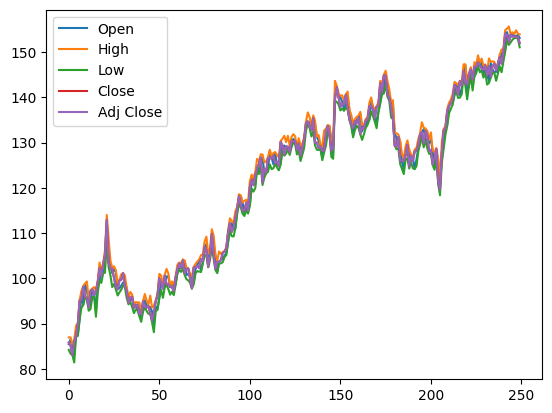

In [110]:
amzn_data.plot(kind='line',y=['Open', 'High', 'Low', 'Close', 'Adj Close'])

<Axes: >

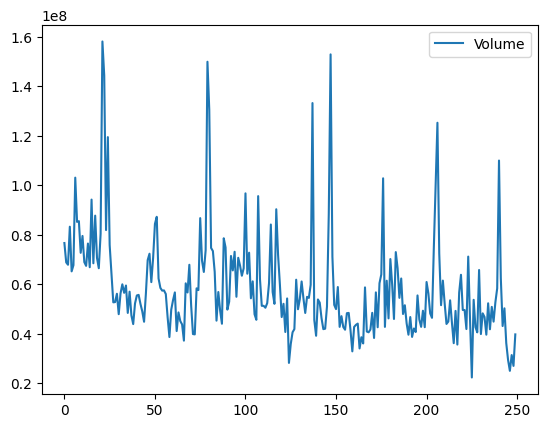

In [111]:
amzn_data.plot(kind='line',y=['Volume'])

In [112]:
def calculate_moving_average(data, window_size=30):
    """
    Calculates the moving average over a specified window size.
    
    Parameters:
        data (pandas.Series): The data series (e.g., closing prices).
        window_size (int): The window size for calculating the moving average.
        
    Returns:
        pandas.Series: The moving average.
    """

    return data.rolling(window=window_size).mean()

def calculate_rsi(data, window_size=14):
    """
    Calculates the Relative Strength Index (RSI).
    
    Parameters:
        data (pandas.Series): The data series (e.g., closing prices).
        window_size (int): The window size for calculating RSI.
        
    Returns:
        pandas.Series: The RSI values.
    """
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window_size).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window_size).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [113]:
amzn_data['Rolling_Average_30d'] = calculate_moving_average(stock_data['Close'])

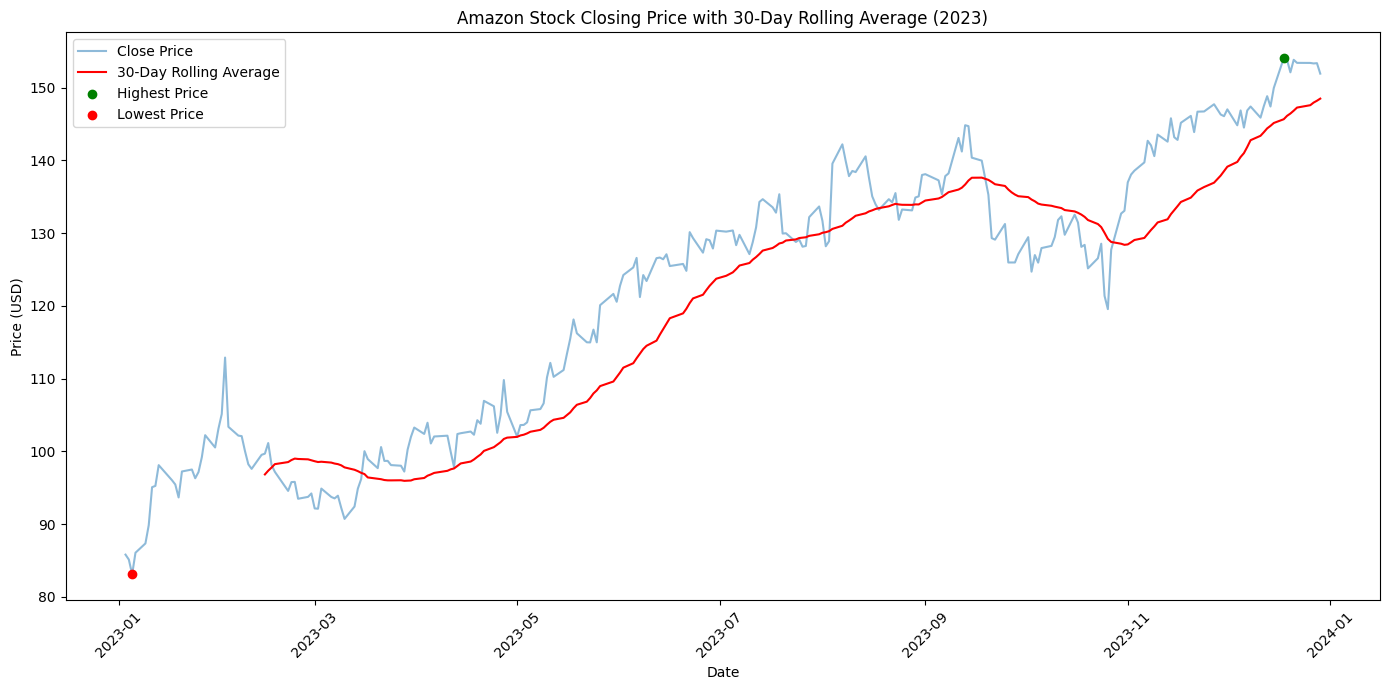

((154.07000732421875, datetime.date(2023, 12, 18)),
 (83.12000274658203, datetime.date(2023, 1, 5)))

In [114]:


# Identifying notable peaks and troughs
max_price = amzn_data['Close'].max()
max_price_date = amzn_data[amzn_data['Close'] == max_price]['Date'].dt.date.iloc[0]

min_price = amzn_data['Close'].min()
min_price_date = amzn_data[amzn_data['Close'] == min_price]['Date'].dt.date.iloc[0]

# Trend analysis through rolling average
amzn_data['Rolling_Average_30d'] = amzn_data['Close'].rolling(window=30).mean()

# Plotting the Closing Price with its 30-day Rolling Average
plt.figure(figsize=(14, 7))
plt.plot(amzn_data['Date'], amzn_data['Close'], label='Close Price', alpha=0.5)
plt.plot(amzn_data['Date'], amzn_data['Rolling_Average_30d'], label='30-Day Rolling Average', color='red')
plt.scatter(max_price_date, max_price, color='green', label='Highest Price', zorder=5)
plt.scatter(min_price_date, min_price, color='red', label='Lowest Price', zorder=5)
plt.title('Amazon Stock Closing Price with 30-Day Rolling Average (2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(max_price, max_price_date), (min_price, min_price_date)


This analysis suggests that while Amazon's stock had periods of volatility, there was a significant upward trend towards the latter part of the year. The use of rolling averages is particularly useful for identifying the general direction of the stock price movement beyond the daily price fluctuations and it is clearly an upward trend with min price as 83 and max price as 154

In [115]:
amzn_data['RSI'] = calculate_rsi(amzn_data['Close'])

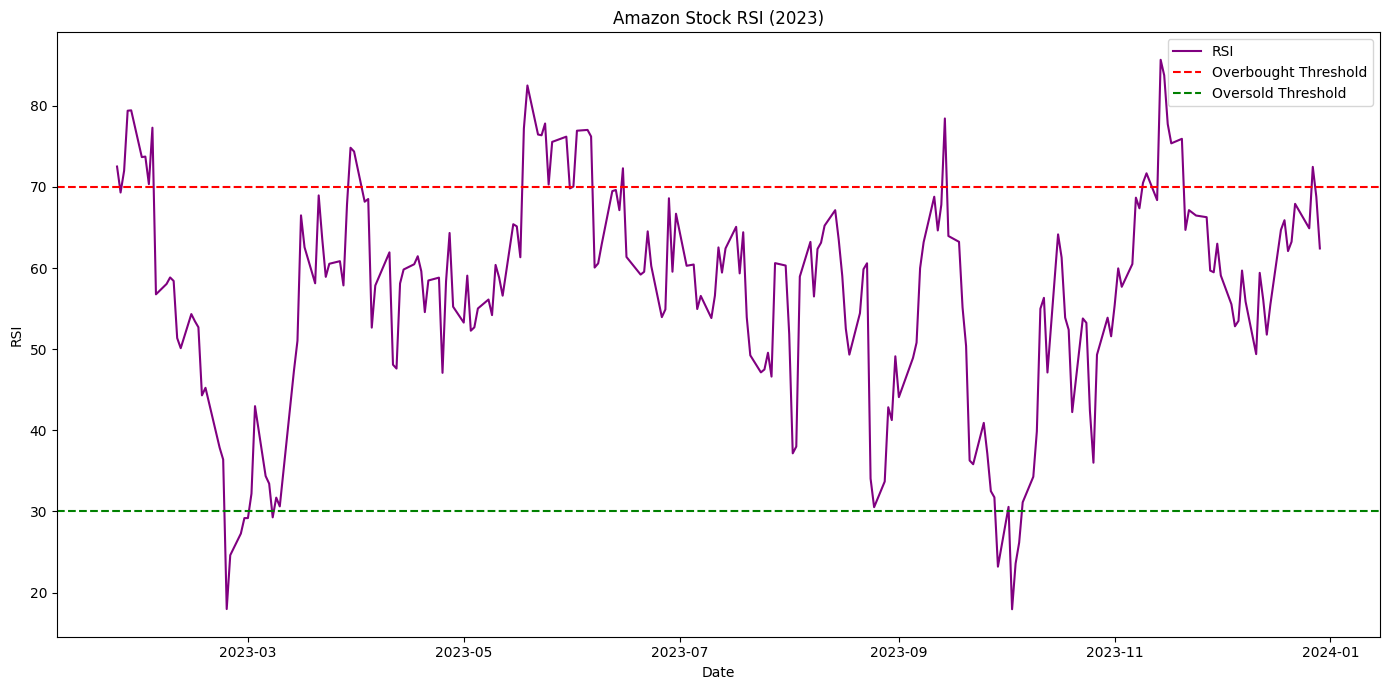

Overbought has happens on 32 occasions and dates are [datetime.date(2023, 1, 23) datetime.date(2023, 1, 25)
 datetime.date(2023, 1, 26) datetime.date(2023, 1, 27)
 datetime.date(2023, 1, 30) datetime.date(2023, 1, 31)
 datetime.date(2023, 2, 1) datetime.date(2023, 2, 2)
 datetime.date(2023, 3, 30) datetime.date(2023, 3, 31)
 datetime.date(2023, 5, 18) datetime.date(2023, 5, 19)
 datetime.date(2023, 5, 22) datetime.date(2023, 5, 23)
 datetime.date(2023, 5, 24) datetime.date(2023, 5, 25)
 datetime.date(2023, 5, 26) datetime.date(2023, 5, 30)
 datetime.date(2023, 6, 1) datetime.date(2023, 6, 2)
 datetime.date(2023, 6, 5) datetime.date(2023, 6, 6)
 datetime.date(2023, 6, 15) datetime.date(2023, 9, 14)
 datetime.date(2023, 11, 9) datetime.date(2023, 11, 10)
 datetime.date(2023, 11, 14) datetime.date(2023, 11, 15)
 datetime.date(2023, 11, 16) datetime.date(2023, 11, 17)
 datetime.date(2023, 11, 20) datetime.date(2023, 12, 27)]
Oversold has happens on 10 occasions and dates are [datetime.date

In [116]:
plt.figure(figsize=(14, 7))
plt.plot(amzn_data['Date'], amzn_data['RSI'], label='RSI', color='purple')
plt.title('Amazon Stock RSI (2023)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, linestyle='--', color='red', label='Overbought Threshold')
plt.axhline(30, linestyle='--', color='green', label='Oversold Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Check for periods of overbought or oversold conditions
overbought_periods = amzn_data[amzn_data['RSI'] > 70]['Date'].dt.date.unique()
oversold_periods = amzn_data[amzn_data['RSI'] < 30]['Date'].dt.date.unique()

print("Overbought has happens on {0} occasions and dates are {1}".format(len(overbought_periods),overbought_periods))


print("Oversold has happens on {0} occasions and dates are {1}".format(len(oversold_periods),oversold_periods))


There were multiple periods where the RSI crossed above the overbought threshold (70), suggesting that the stock was potentially overbought. These periods are scattered throughout the year, with concentrations in late January, May, early June, mid-September, and mid to late November. Overbought conditions suggest that the stock might have been overvalued during these times, and a correction or reversal could be expected.

Conversely, there were fewer instances where the RSI fell below the oversold threshold (30), indicating potential oversold conditions. These occurred in late February to early March, early to mid-September, and early to mid-October. Oversold conditions suggest the stock might have been undervalued, and it could be a buying opportunity expecting a price rebound.

In [117]:
# Calculating the correlation between Closing Price, RSI, and Trading Volume
correlation_matrix = amzn_data[['Close', 'RSI', 'Volume']].corr()

# Display the correlation matrix
correlation_matrix

,Close,RSI,Volume
Close,1.000000,0.214581,-0.308363
RSI,0.214581,1.000000,0.098343
Volume,-0.308363,0.098343,1.000000


There is a moderate negative correlation (-0.30) between the closing price and trading volume. This suggests that on days when the stock price was higher, trading volumes tended to be lower, and vice versa. This could indicate that significant price movements, either upward or downward, might not always be accompanied by high trading volumes. It's also possible that larger price changes might have occurred on days with relatively lower volume, suggesting that price movements could be more influenced by the sentiment or specific news rather than widespread trading activity.

The RSI shows a slight positive correlation (0.21) with the closing price, indicating that as the price increases, the RSI tends to increase as well, which aligns with the RSI's nature as a momentum indicator. Higher prices leading to higher RSI values suggest momentum is building, potentially signaling continuing upward price movements until RSI indicates overbought conditions.

The correlation between RSI and trading volume is positive but weak (0.09), indicating there is a slight tendency for trading volume to increase with higher RSI values. This could suggest that as stock becomes overbought or oversold (RSI moving to extreme values), trading activity slightly increases, possibly due to traders reacting to these momentum indicators.

In [99]:
amzn_data.to_csv

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling_Average_30d,RSI
0,2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000,NaN,NaN
1,2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100,NaN,NaN
2,2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800,NaN,NaN
3,2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400,NaN,NaN
4,2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,NaN,NaN
...,...,...,...,...,...,...,...,...,...
225,2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,136.352334,66.477713
226,2023-11-27,147.529999,149.259995,146.880005,147.729996,147.729996,53762400,136.950334,66.272880
227,2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700,137.433001,59.694770
228,2023-11-29,147.850006,148.539993,145.970001,146.320007,146.320007,40610900,137.928001,59.481228


Importing plotly failed. Interactive plots will not work.


07:55:34 - cmdstanpy - INFO - Chain [1] start processing
07:55:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\sg1404-dsk01-user1\Downloads\training\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sg1404-dsk01-user1\Downloads\training\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


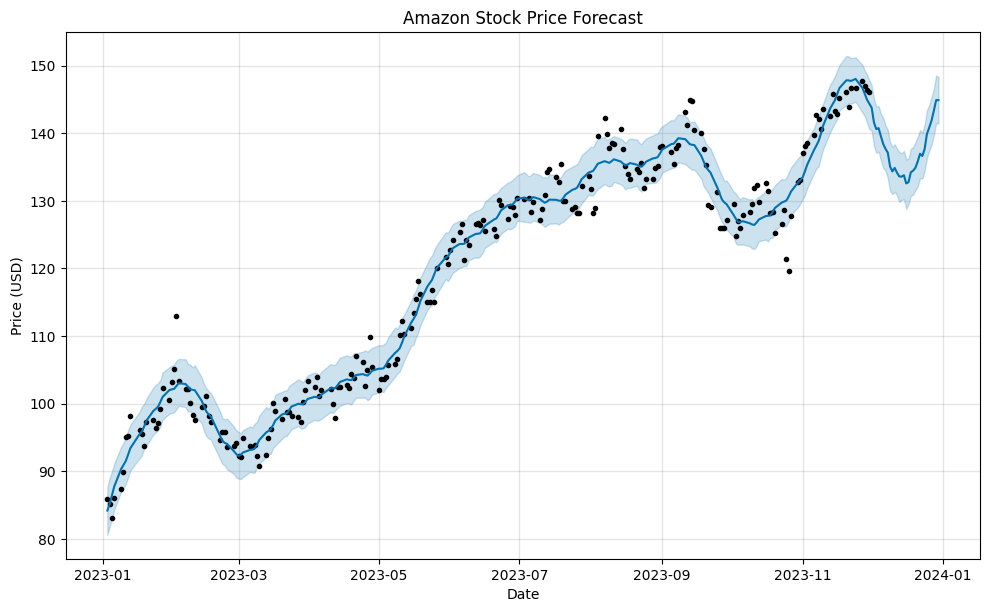

c:\Users\sg1404-dsk01-user1\Downloads\training\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sg1404-dsk01-user1\Downloads\training\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\sg1404-dsk01-user1\Downloads\training\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime o

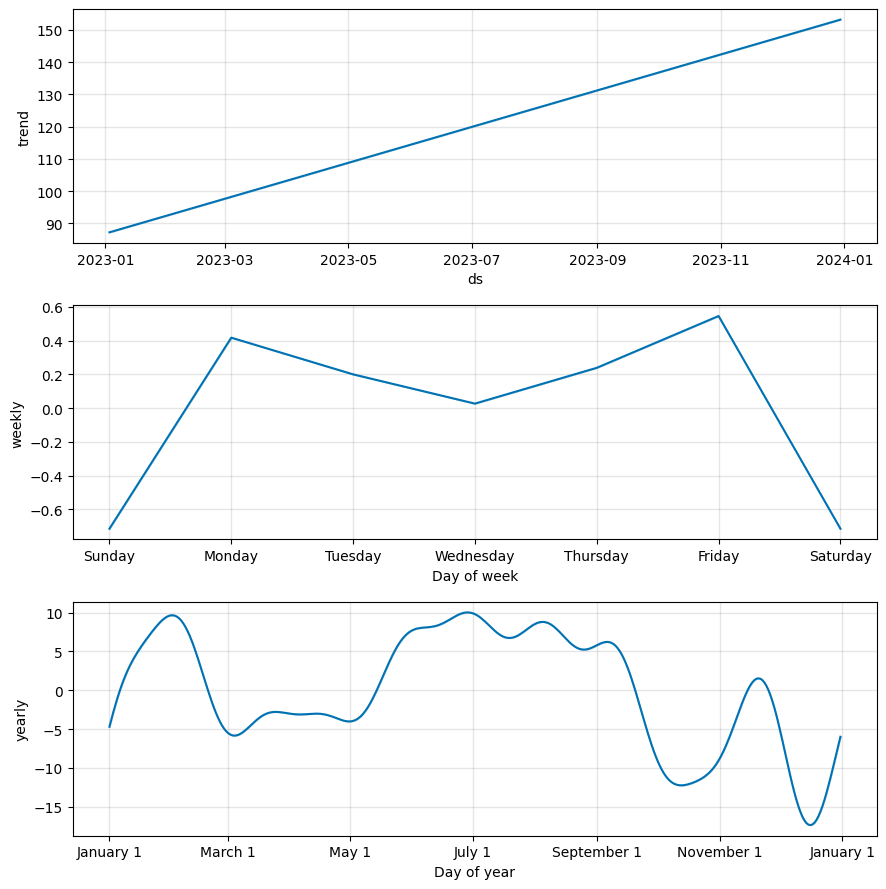

In [102]:
from prophet import Prophet

# Preparing data for Prophet model
prophet_data = amzn_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
model.fit(prophet_data)

# Create future dataframe for forecasting for next month
future = model.make_future_dataframe(periods=30, freq='D')

# Predict the future with the model
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Amazon Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)


In [ ]:
test_data=